# **EXPERIMENT - 3 LOGISTIC REGRESSION FROM SCRATCH**

##Baseline Logistic Regression Training

In [13]:
# Imports
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load and preprocess data
df = pd.read_csv("/content/spam.csv", encoding='latin-1')[["v1", "v2"]]
df.columns = ["label", "message"]
y = df["label"].map({"ham": 0, "spam": 1}).values
X_raw = df["message"].values

# CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(X_raw).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_=0.0):
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _cost(self, h, y):
        m = len(y)
        reg = (self.lambda_ / (2 * m)) * np.sum(self.weights ** 2)
        return - (1/m) * np.sum(y * np.log(h + 1e-15) + (1 - y) * np.log(1 - h + 1e-15)) + reg

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            h = self._sigmoid(z)

            dw = (1/m) * np.dot(X.T, (h - y)) + (self.lambda_ / m) * self.weights
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self._cost(h, y))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return (self._sigmoid(z) >= 0.5).astype(int)

# Train baseline model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Report metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.8780269058295964
Precision: 1.0
Recall: 0.09333333333333334
F1 Score: 0.17073170731707318
Confusion Matrix:
 [[965   0]
 [136  14]]


##Feature Scaling

In [14]:
# Apply StandardScaler to CountVectorizer features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Retrain model after scaling
model_scaled = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model_scaled.fit(X_train, y_train)
predictions_scaled = model_scaled.predict(X_test)

# Report metrics
print("Accuracy (Scaled):", accuracy_score(y_test, predictions_scaled))
print("Precision:", precision_score(y_test, predictions_scaled))
print("Recall:", recall_score(y_test, predictions_scaled))
print("F1 Score:", f1_score(y_test, predictions_scaled))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_scaled))

Accuracy (Scaled): 0.9910313901345291
Precision: 0.9861111111111112
Recall: 0.9466666666666667
F1 Score: 0.9659863945578231
Confusion Matrix:
 [[963   2]
 [  8 142]]


##Feature Representation Comparison

In [15]:
# TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X_raw).toarray()

# Train-test split and scaling
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

# Train model on TF-IDF features
model_tfidf = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_tfidf = model_tfidf.predict(X_test_tfidf)

# Report metrics
print("\n--- TF-IDF Vectorizer Performance ---")
print("Accuracy:", accuracy_score(y_test_tfidf, predictions_tfidf))
print("Precision:", precision_score(y_test_tfidf, predictions_tfidf))
print("Recall:", recall_score(y_test_tfidf, predictions_tfidf))
print("F1 Score:", f1_score(y_test_tfidf, predictions_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test_tfidf, predictions_tfidf))


--- TF-IDF Vectorizer Performance ---
Accuracy: 0.9811659192825112
Precision: 0.9215686274509803
Recall: 0.94
F1 Score: 0.9306930693069307
Confusion Matrix:
 [[953  12]
 [  9 141]]


##Effect of Regularization

In [16]:
# Try different lambda values
lambda_values = [0.01, 0.1, 1.0]
print("\n--- Regularization Comparison (CountVectorizer) ---")
for lam in lambda_values:
    model_reg = LogisticRegressionScratch(learning_rate=0.01, epochs=1000, lambda_=lam)
    model_reg.fit(X_train, y_train)
    preds_reg = model_reg.predict(X_test)

    print(f"\nλ = {lam}")
    print("Accuracy:", accuracy_score(y_test, preds_reg))
    print("Precision:", precision_score(y_test, preds_reg))
    print("Recall:", recall_score(y_test, preds_reg))
    print("F1 Score:", f1_score(y_test, preds_reg))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds_reg))


--- Regularization Comparison (CountVectorizer) ---

λ = 0.01
Accuracy: 0.9910313901345291
Precision: 0.9861111111111112
Recall: 0.9466666666666667
F1 Score: 0.9659863945578231
Confusion Matrix:
 [[963   2]
 [  8 142]]

λ = 0.1
Accuracy: 0.9910313901345291
Precision: 0.9861111111111112
Recall: 0.9466666666666667
F1 Score: 0.9659863945578231
Confusion Matrix:
 [[963   2]
 [  8 142]]

λ = 1.0
Accuracy: 0.9910313901345291
Precision: 0.9861111111111112
Recall: 0.9466666666666667
F1 Score: 0.9659863945578231
Confusion Matrix:
 [[963   2]
 [  8 142]]


##Learning Dynamics (Loss Curve)

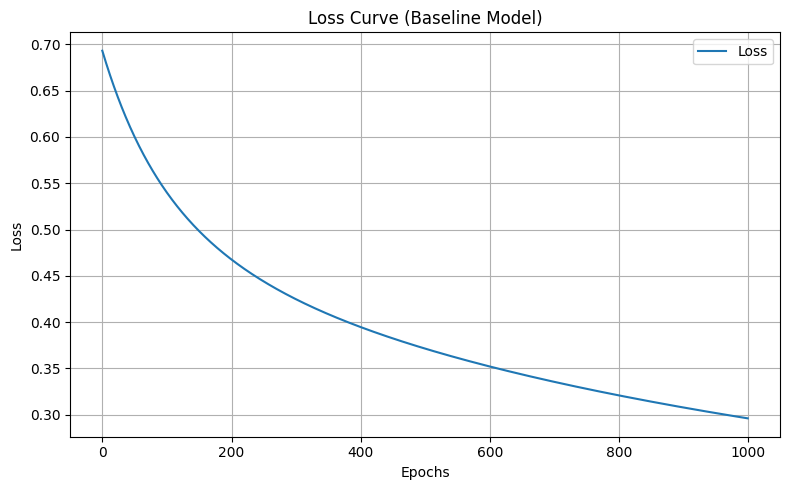

In [17]:
import matplotlib.pyplot as plt
# Plot loss curve for baseline model
plt.figure(figsize=(8, 5))
plt.plot(model.cost_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (Baseline Model)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()